In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../../db_tables/'

In [3]:
# Load datasets
rol = pd.read_csv(path + "rol.tsv", sep= "\t")
mlo = pd.read_csv(path + "mlo.tsv", sep= "\t")
dataset = pd.read_csv(path + "dataset.tsv", sep= "\t")
protein_has_mlo = pd.read_csv(path + "protein_has_mlo.tsv", sep= "\t").merge(rol, how='left').merge(mlo, how='left').merge(dataset, how='left')
protein_has_mlo.drop(
    columns = ['id_mlo', 'id_rol', 'id_dataset'],
    inplace= True
)

In [4]:
# Proteins name
protein = pd.read_csv(path + 'protein.tsv', sep='\t', usecols=['id_protein', 'uniprot_acc', 'uniprot_name'])
protein.uniprot_name = protein.uniprot_name.str.split("_").str[0] # delete "_HUMAN"
protein

,id_protein,uniprot_acc,uniprot_name
0,1,P35637,FUS
1,2,Q06787,FMR1
2,3,Q92804,RBP56
3,4,Q13148,TADBP
4,5,Q01844,EWS
...,...,...,...
5736,5737,Q9Y6R4,M3K4
5737,5738,Q9Y6S9,RPKL1
5738,5739,Q9Y6U7,RN215
5739,5740,Q9Y6W6,DUS10


In [5]:
# Dont forget! protein_has_mlo allows null values
protein_has_mlo.isna().any()

reviewed          True
id_protein       False
id_proteinmlo    False
rol               True
mlo               True
dataset          False
dtype: bool

In [6]:
# drop nans in mlo col then drop duplicates to not repeat pairs protein-MLO
proteinsbymlo = protein_has_mlo[['id_protein', 'mlo']][protein_has_mlo.mlo.notnull()].drop_duplicates()
proteinsbymlo = proteinsbymlo.id_protein.value_counts()
proteinsbymlo = proteinsbymlo.reset_index().rename(columns= {'index': 'id_protein', 'id_protein': 'mlo_count'})

proteinsbymlo

,id_protein,mlo_count
0,1,14
1,4217,14
2,4126,13
3,2,13
4,4,12
...,...,...
5713,2834,1
5714,2835,1
5715,2836,1
5716,2837,1


In [7]:
# Add proteins name
proteinsbymlo_df = protein.merge(proteinsbymlo).sort_values('mlo_count', ascending= False)#.set_index('id_protein')
proteinsbymlo_df

,id_protein,uniprot_acc,uniprot_name,mlo_count
0,1,P35637,FUS,14
4194,4217,P22626,ROA2,14
4103,4126,P09651,ROA1,13
1,2,Q06787,FMR1,13
3,4,Q13148,TADBP,12
...,...,...,...,...
2833,2834,Q14168,MPP2,1
2834,2835,P48169,GBRA4,1
2835,2836,O76024,WFS1,1
2836,2837,Q9Y4G8,RPGF2,1


In [8]:
# Cuantas proteinas asociadas a cuantas MLO
mlo_frequency = proteinsbymlo_df.mlo_count.value_counts().to_frame().reset_index().rename(columns = {'index': 'mlo_count', 'mlo_count': 'protein_count'})
mlo_frequency

,mlo_count,protein_count
0,1,3723
1,2,1248
2,3,423
3,4,165
4,5,77
5,6,35
6,7,22
7,9,9
8,8,9
9,14,2


In [9]:
proteinsbymlo_df

,id_protein,uniprot_acc,uniprot_name,mlo_count
0,1,P35637,FUS,14
4194,4217,P22626,ROA2,14
4103,4126,P09651,ROA1,13
1,2,Q06787,FMR1,13
3,4,Q13148,TADBP,12
...,...,...,...,...
2833,2834,Q14168,MPP2,1
2834,2835,P48169,GBRA4,1
2835,2836,O76024,WFS1,1
2836,2837,Q9Y4G8,RPGF2,1


In [10]:
proteinsbymlo_df[['uniprot_name', 'mlo_count']].merge(mlo_frequency)

,uniprot_name,mlo_count,protein_count
0,FUS,14,2
1,ROA2,14,2
2,ROA1,13,2
3,FMR1,13,2
4,TADBP,12,1
...,...,...,...
5713,MPP2,1,3723
5714,GBRA4,1,3723
5715,WFS1,1,3723
5716,RPGF2,1,3723


In [11]:
# Color
pal = sns.color_palette("hls")
pal = pal.as_hex()

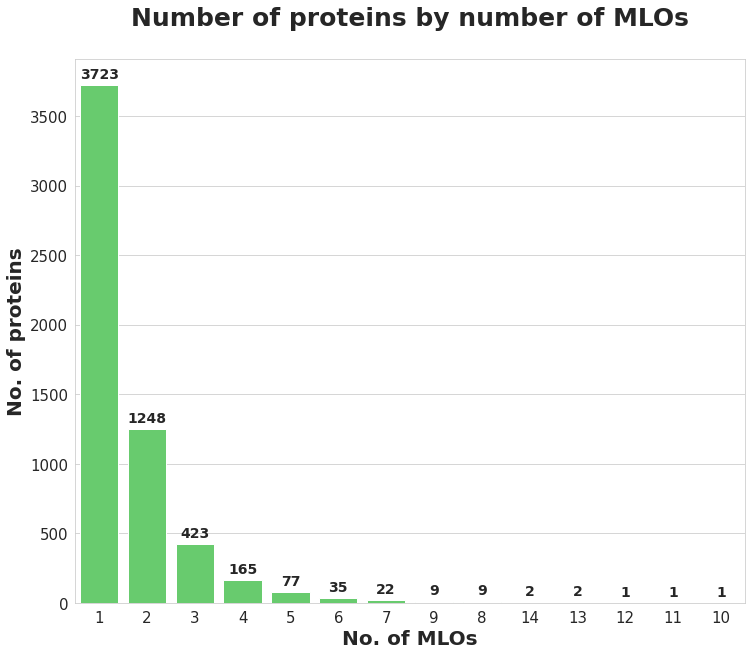

In [20]:
sns.set_style("whitegrid")
bar, ax = plt.subplots(figsize=(12,10))
ax = sns.barplot(x= mlo_frequency.mlo_count, y= mlo_frequency.protein_count, color= pal[2])
ax.tick_params(labelsize=15)
ax.set_xlim(-.5, 13.5)
ax.set_title("Number of proteins by number of MLOs\n", fontsize=25, weight='bold')
ax.set_ylabel ("No. of proteins", fontsize=20, weight='bold')
ax.set_xlabel ("No. of MLOs", fontsize=20, weight='bold')
ax.set_xticklabels(mlo_frequency.mlo_count)

for i, y in enumerate(mlo_frequency.protein_count):
    ax.text(i, y+50, str(y), weight='bold', fontsize=14, horizontalalignment='center')


bar.savefig("number_proteins_mlo.png", dpi=300, transparent= True)
plt.show()

In [21]:
# Frequency distribution plot
mlo_protein = protein_has_mlo.groupby('mlo')['id_protein'].count().sort_values(ascending = False)
mlo_protein

mlo
Nucleolus                                         3315
Stress granule                                    2529
Postsynaptic density                              1388
P-body                                             818
Centrosome/Spindle pole body                       534
                                                  ... 
collagen-containing extracellular matrix             1
condensed compartments of microtubule bundling       1
cytoplasmic microtubule                              1
euchromatin                                          1
synaptosome                                          1
Name: id_protein, Length: 103, dtype: int64

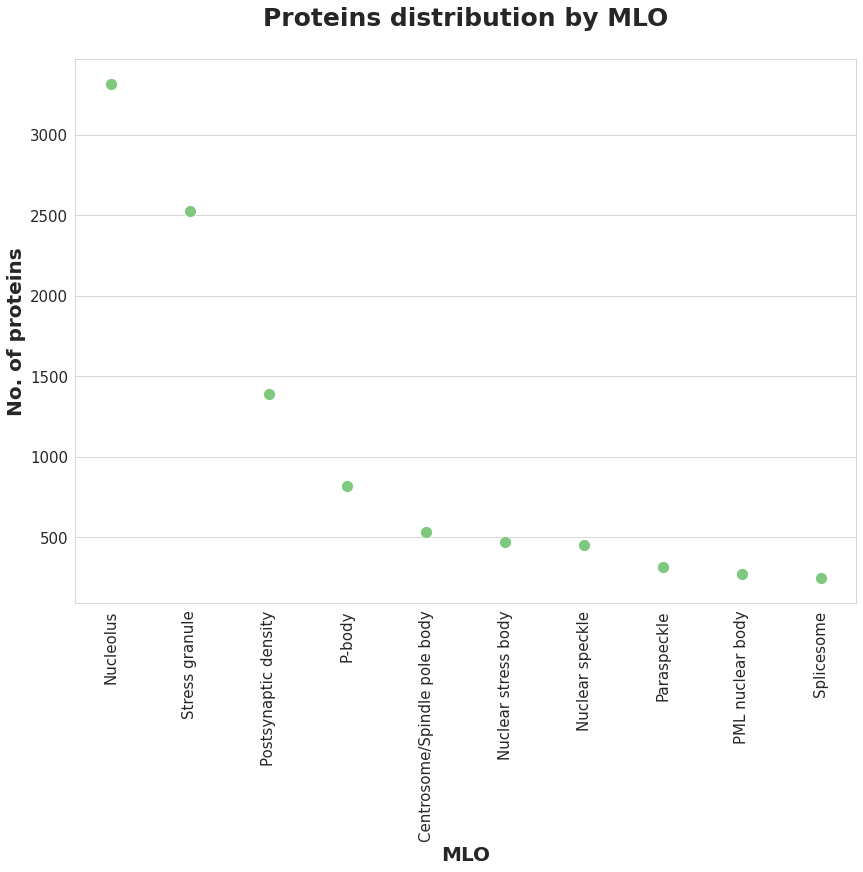

In [24]:
# MLOs con 
sns.set_style("whitegrid")
sns.set_palette("Accent")
bar, ax = plt.subplots(figsize=(14,10))
ax = sns.scatterplot(x= mlo_protein[:10].index, y= mlo_protein[:10], s= 150)
ax.tick_params(labelsize=15)
ax.tick_params(axis='x', labelrotation= 90)
ax.grid(axis="x")
ax.set_title("Proteins distribution by MLO\n", fontsize=25, weight='bold')
ax.set_ylabel ("No. of proteins", fontsize=20, weight='bold')
ax.set_xlabel ("MLO", fontsize=20, weight='bold')
plt.show()
#bar.savefig("proteins_mlos.png", dpi= 300, bbox_inches='tight')